###epoch 15###

b 8

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.9104 - loss: 0.2925 - val_accuracy: 0.9532 - val_loss: 0.1394
Epoch 2/15
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9752 - loss: 0.0763 - val_accuracy: 0.9662 - val_loss: 0.1070
Epoch 3/15
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.9818 - loss: 0.0539 - val_accuracy: 0.9774 - val_loss: 0.0809
Epoch 4/15
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9874 - loss: 0.0395 - val_accuracy: 0.9745 - val_loss: 0.1045
Epoch 5/15
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.9895 - loss: 0.0329 - val_accuracy: 0.9746 - val_loss: 0.1059
Epoch 6/15
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.9923 - loss: 0.0254 - val_accuracy: 0.9797 - val_loss: 0.0941
Epoch 7/15
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.9939 - loss: 0.0194 - val_accuracy: 0.9767 - val_loss: 0.1153
Epoch 8/15
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.9938 - loss: 0

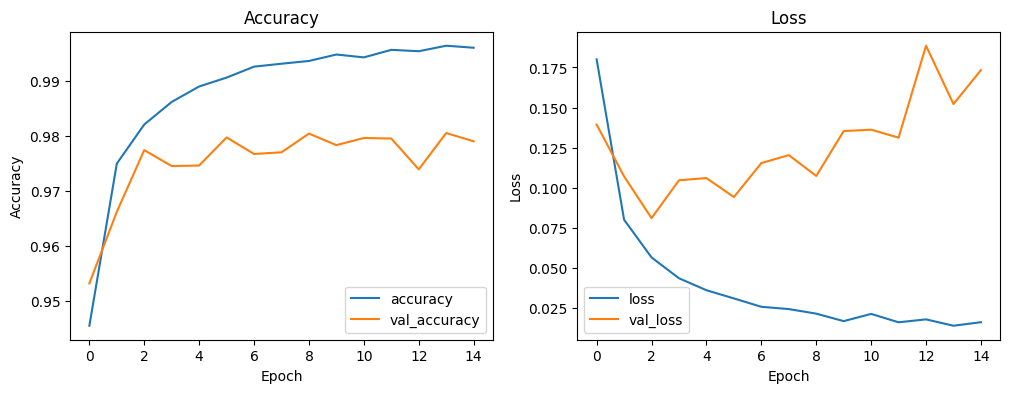

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=15, batch_size=8, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


b 16

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.9086 - loss: 0.3067 - val_accuracy: 0.9692 - val_loss: 0.0966
Epoch 2/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9741 - loss: 0.0835 - val_accuracy: 0.9740 - val_loss: 0.0807
Epoch 3/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9848 - loss: 0.0494 - val_accuracy: 0.9751 - val_loss: 0.0801
Epoch 4/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9893 - loss: 0.0335 - val_accuracy: 0.9814 - val_loss: 0.0623
Epoch 5/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.9919 - loss: 0.0247 - val_accuracy: 0.9776 - val_loss: 0.0817
Epoch 6/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.9941 - loss: 0.0184 - val_accuracy: 0.9790 - val_loss: 0.0792
Epoch 7/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9939 - loss: 0.0195 - val_accuracy: 0.9768 - val_loss: 0.0918
Epoch 8/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9958 - loss: 0

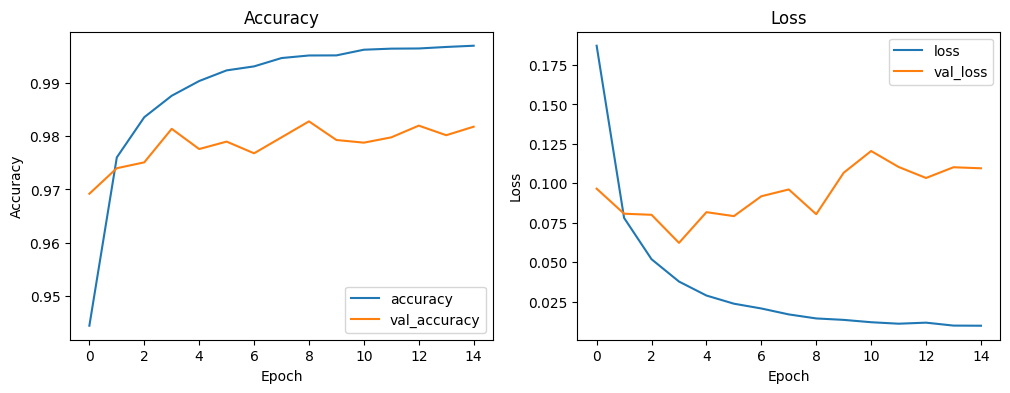

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=15, batch_size=16, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")
# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


b 32

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9013 - loss: 0.3405 - val_accuracy: 0.9674 - val_loss: 0.1079
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9748 - loss: 0.0836 - val_accuracy: 0.9750 - val_loss: 0.0808
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9848 - loss: 0.0497 - val_accuracy: 0.9793 - val_loss: 0.0696
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9888 - loss: 0.0356 - val_accuracy: 0.9790 - val_loss: 0.0705
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9929 - loss: 0.0246 - val_accuracy: 0.9825 - val_loss: 0.0608
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9933 - loss: 0.0198 - val_accuracy: 0.9777 - val_loss: 0.0735
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9952 - loss: 0.0150 - val_accuracy: 0.9815 - val_loss: 0.0689
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9949 - loss: 0

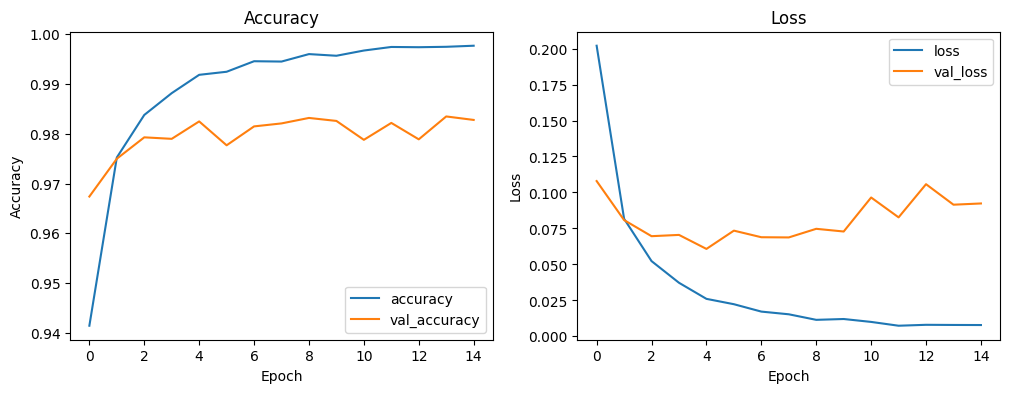

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=15, batch_size=32, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")
# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


b 64

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8872 - loss: 0.3917 - val_accuracy: 0.9655 - val_loss: 0.1141
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9718 - loss: 0.0953 - val_accuracy: 0.9747 - val_loss: 0.0794
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9824 - loss: 0.0565 - val_accuracy: 0.9783 - val_loss: 0.0689
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9883 - loss: 0.0391 - val_accuracy: 0.9791 - val_loss: 0.0675
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9914 - loss: 0.0279 - val_accuracy: 0.9733 - val_loss: 0.0934
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9928 - loss: 0.0238 - val_accuracy: 0.9820 - val_loss: 0.0619
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9961 - loss: 0.0138 - val_accuracy: 0.9817 - val_loss: 0.0697
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9960 - loss: 0.0129 - val_accuracy

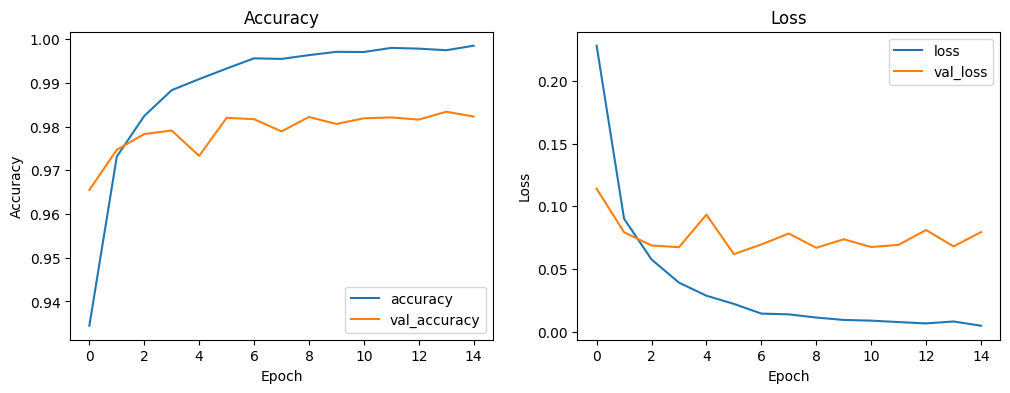

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=15, batch_size=64, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")
# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


###epoch 25 ###

b 8

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9111 - loss: 0.2896 - val_accuracy: 0.9659 - val_loss: 0.1111
Epoch 2/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.9742 - loss: 0.0835 - val_accuracy: 0.9746 - val_loss: 0.0901
Epoch 3/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.9833 - loss: 0.0525 - val_accuracy: 0.9771 - val_loss: 0.0836
Epoch 4/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.9871 - loss: 0.0404 - val_accuracy: 0.9803 - val_loss: 0.0742
Epoch 5/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.9904 - loss: 0.0318 - val_accuracy: 0.9781 - val_loss: 0.0971
Epoch 6/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.9924 - loss: 0.0247 - val_accuracy: 0.9785 - val_loss: 0.0953
Epoch 7/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.9916 - loss: 0.0236 - val_accuracy: 0.9783 - val_loss: 0.1127
Epoch 8/25
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.9939 - loss: 0

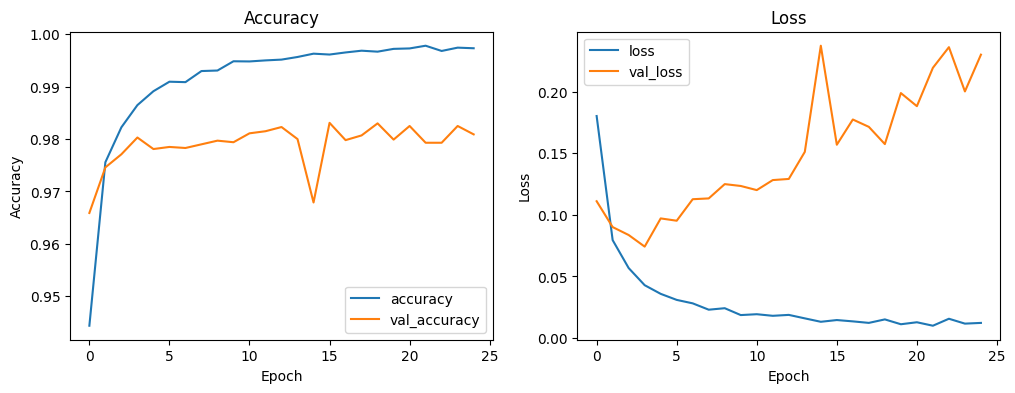

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=8, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")
# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

b 16

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9076 - loss: 0.3081 - val_accuracy: 0.9708 - val_loss: 0.0889
Epoch 2/25
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9756 - loss: 0.0799 - val_accuracy: 0.9753 - val_loss: 0.0813
Epoch 3/25
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9837 - loss: 0.0505 - val_accuracy: 0.9730 - val_loss: 0.0978
Epoch 4/25
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9888 - loss: 0.0347 - val_accuracy: 0.9778 - val_loss: 0.0811
Epoch 5/25
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9914 - loss: 0.0270 - val_accuracy: 0.9759 - val_loss: 0.0886
Epoch 6/25
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9925 - loss: 0.0218 - val_accuracy: 0.9776 - val_loss: 0.0945
Epoch 7/25
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9942 - loss: 0.0165 - val_accuracy: 0.9796 - val_loss: 0.0893
Epoch 8/25
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9950 - loss: 0

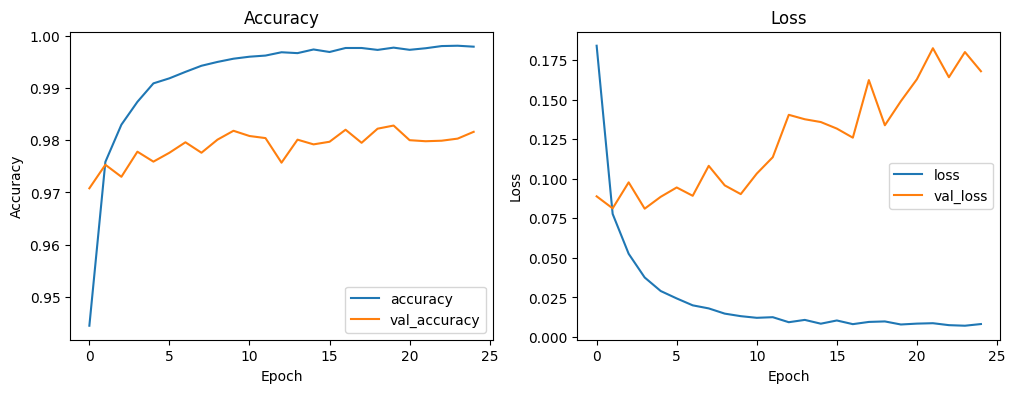

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=16, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")
# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

b 32

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8991 - loss: 0.3459 - val_accuracy: 0.9669 - val_loss: 0.1050
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9759 - loss: 0.0803 - val_accuracy: 0.9747 - val_loss: 0.0819
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9838 - loss: 0.0492 - val_accuracy: 0.9747 - val_loss: 0.0797
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9888 - loss: 0.0351 - val_accuracy: 0.9778 - val_loss: 0.0708
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9926 - loss: 0.0237 - val_accuracy: 0.9811 - val_loss: 0.0660
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9944 - loss: 0.0176 - val_accuracy: 0.9819 - val_loss: 0.0711
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9953 - loss: 0.0143 - val_accuracy: 0.9769 - val_loss: 0.0906
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9963 - loss: 0

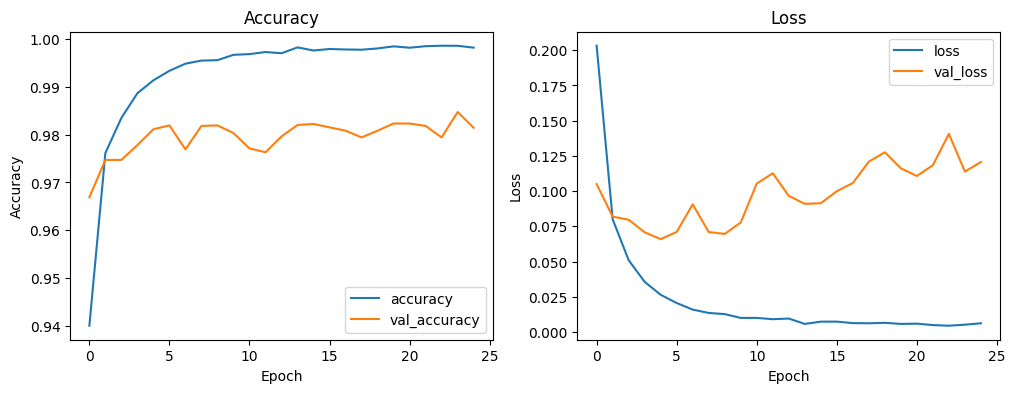

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=32, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")
# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

b 64

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8920 - loss: 0.3841 - val_accuracy: 0.9669 - val_loss: 0.1098
Epoch 2/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9724 - loss: 0.0934 - val_accuracy: 0.9748 - val_loss: 0.0831
Epoch 3/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9830 - loss: 0.0573 - val_accuracy: 0.9780 - val_loss: 0.0696
Epoch 4/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9890 - loss: 0.0386 - val_accuracy: 0.9792 - val_loss: 0.0654
Epoch 5/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9914 - loss: 0.0283 - val_accuracy: 0.9826 - val_loss: 0.0614
Epoch 6/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9943 - loss: 0.0212 - val_accuracy: 0.9829 - val_loss: 0.0618
Epoch 7/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9950 - loss: 0.0161 - val_accuracy: 0.9800 - val_loss: 0.0683
Epoch 8/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9967 - loss: 0.0117 - val_accuracy:

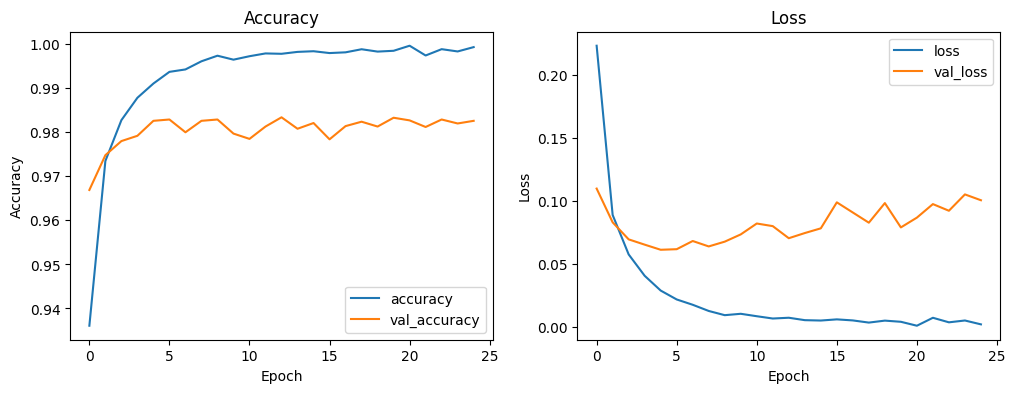

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=64, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")
# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

###epoch 50###

b 8

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.9100 - loss: 0.2936 - val_accuracy: 0.9707 - val_loss: 0.0977
Epoch 2/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.9746 - loss: 0.0809 - val_accuracy: 0.9759 - val_loss: 0.0844
Epoch 3/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 0.9821 - loss: 0.0554 - val_accuracy: 0.9773 - val_loss: 0.0806
Epoch 4/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 0.9876 - loss: 0.0393 - val_accuracy: 0.9783 - val_loss: 0.0770
Epoch 5/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 0.9891 - loss: 0.0327 - val_accuracy: 0.9769 - val_loss: 0.0872
Epoch 6/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9916 - loss: 0.0256 - val_accuracy: 0.9783 - val_loss: 0.0999
Epoch 7/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.9929 - loss: 0.0201 - val_accuracy: 0.9773 - val_loss: 0.1067
Epoch 8/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.9929 - loss: 0

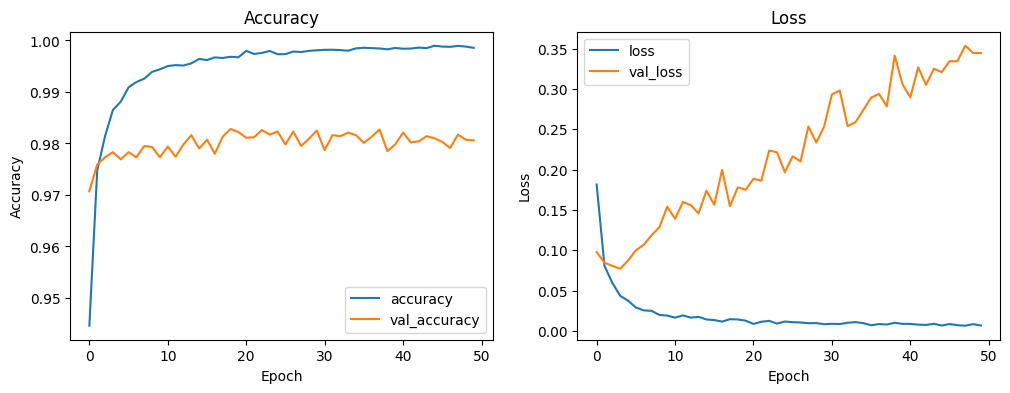

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=50, batch_size=8, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")
# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

b 16

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9073 - loss: 0.3073 - val_accuracy: 0.9650 - val_loss: 0.1172
Epoch 2/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9760 - loss: 0.0784 - val_accuracy: 0.9788 - val_loss: 0.0699
Epoch 3/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9850 - loss: 0.0474 - val_accuracy: 0.9808 - val_loss: 0.0668
Epoch 4/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.9902 - loss: 0.0314 - val_accuracy: 0.9796 - val_loss: 0.0668
Epoch 5/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9915 - loss: 0.0253 - val_accuracy: 0.9751 - val_loss: 0.0897
Epoch 6/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.9925 - loss: 0.0225 - val_accuracy: 0.9790 - val_loss: 0.0860
Epoch 7/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9939 - loss: 0.0179 - val_accuracy: 0.9771 - val_loss: 0.0993
Epoch 8/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.9944 - loss: 0

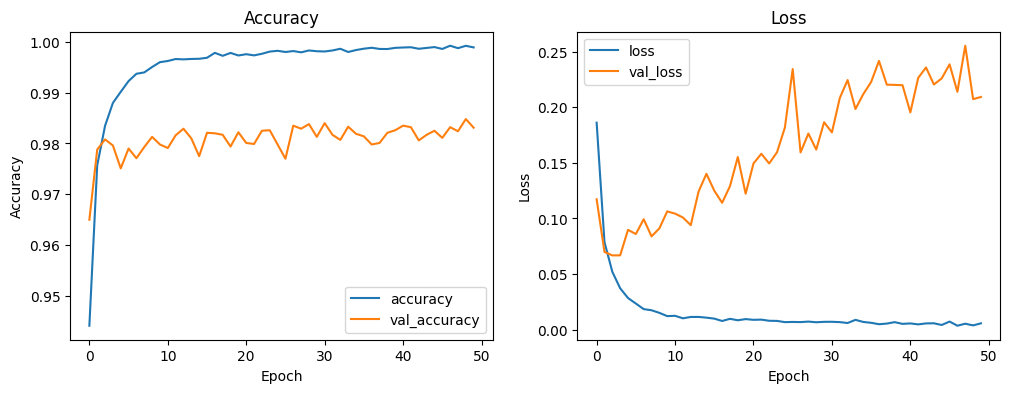

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=50, batch_size=16, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")
# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

b 32

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9024 - loss: 0.3379 - val_accuracy: 0.9738 - val_loss: 0.0891
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9766 - loss: 0.0779 - val_accuracy: 0.9760 - val_loss: 0.0743
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9844 - loss: 0.0503 - val_accuracy: 0.9783 - val_loss: 0.0708
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9899 - loss: 0.0319 - val_accuracy: 0.9795 - val_loss: 0.0653
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9930 - loss: 0.0240 - val_accuracy: 0.9786 - val_loss: 0.0679
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9934 - loss: 0.0210 - val_accuracy: 0.9808 - val_loss: 0.0745
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9957 - loss: 0.0137 - val_accuracy: 0.9805 - val_loss: 0.0752
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9965 - loss: 0

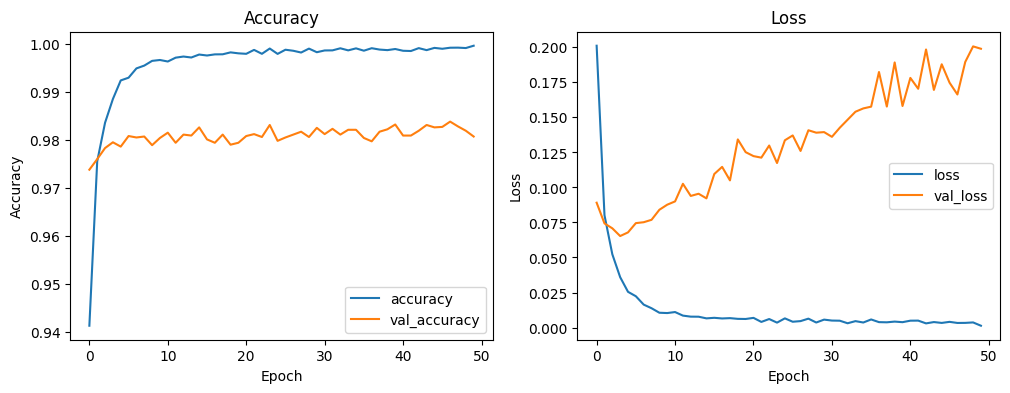

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=50, batch_size=32, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")
# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

b 64

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8862 - loss: 0.3891 - val_accuracy: 0.9645 - val_loss: 0.1141
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9717 - loss: 0.0930 - val_accuracy: 0.9736 - val_loss: 0.0824
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9834 - loss: 0.0585 - val_accuracy: 0.9772 - val_loss: 0.0756
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9893 - loss: 0.0393 - val_accuracy: 0.9807 - val_loss: 0.0650
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9913 - loss: 0.0302 - val_accuracy: 0.9790 - val_loss: 0.0662
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9938 - loss: 0.0212 - val_accuracy: 0.9783 - val_loss: 0.0679
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9956 - loss: 0.0155 - val_accuracy: 0.9798 - val_loss: 0.0685
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9969 - loss: 0.0110 - val_accuracy:

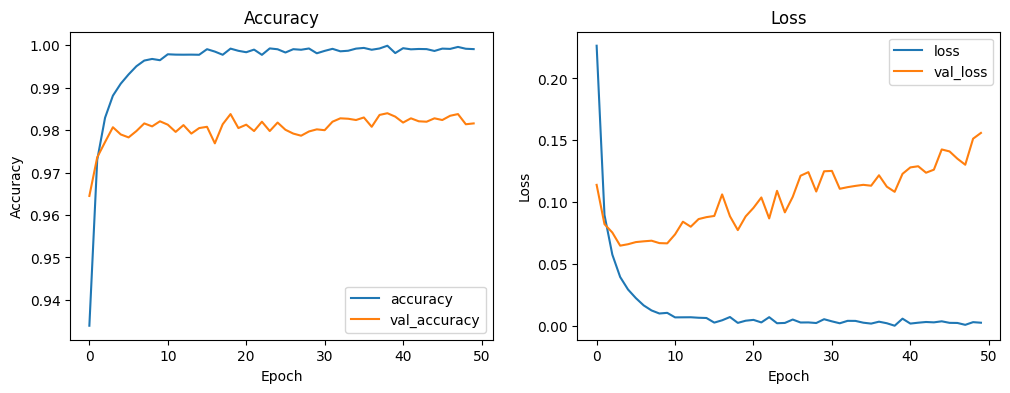

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=50, batch_size=64, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")
# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

### epoch 100 ###

b 8

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.9114 - loss: 0.2929 - val_accuracy: 0.9703 - val_loss: 0.0961
Epoch 2/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.9754 - loss: 0.0818 - val_accuracy: 0.9706 - val_loss: 0.0977
Epoch 3/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.9828 - loss: 0.0545 - val_accuracy: 0.9771 - val_loss: 0.0877
Epoch 4/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.9880 - loss: 0.0374 - val_accuracy: 0.9793 - val_loss: 0.0824
Epoch 5/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.9907 - loss: 0.0319 - val_accuracy: 0.9795 - val_loss: 0.0934
Epoch 6/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.9912 - loss: 0.0269 - val_accuracy: 0.9766 - val_loss: 0.1126
Epoch 7/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 0.9922 - loss: 0.0259 - val_accuracy: 0.9782 - val_loss: 0.1064
Epoch 8/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9933 -

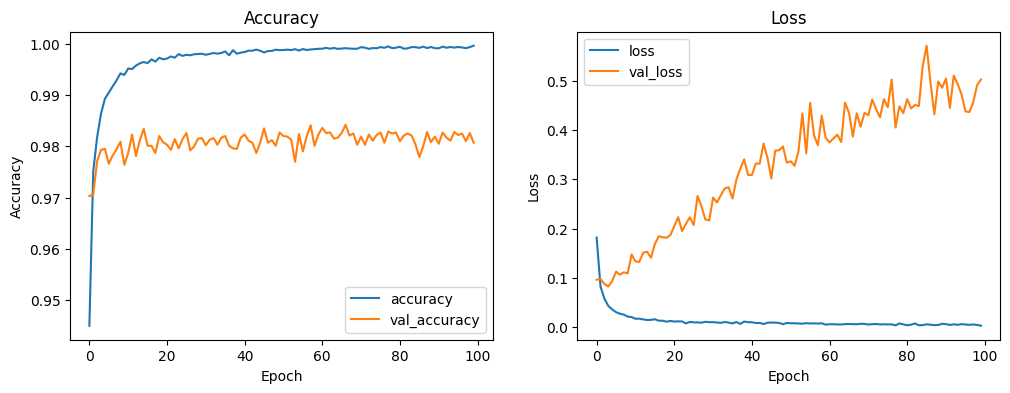

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=100, batch_size=8, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")
# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

b 16

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9084 - loss: 0.3094 - val_accuracy: 0.9704 - val_loss: 0.0962
Epoch 2/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.9753 - loss: 0.0786 - val_accuracy: 0.9749 - val_loss: 0.0800
Epoch 3/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9841 - loss: 0.0495 - val_accuracy: 0.9806 - val_loss: 0.0630
Epoch 4/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9892 - loss: 0.0332 - val_accuracy: 0.9793 - val_loss: 0.0690
Epoch 5/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9925 - loss: 0.0231 - val_accuracy: 0.9770 - val_loss: 0.0873
Epoch 6/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.9930 - loss: 0.0208 - val_accuracy: 0.9809 - val_loss: 0.0755
Epoch 7/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9945 - loss: 0.0187 - val_accuracy: 0.9777 - val_loss: 0.0922
Epoch 8/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9950 -

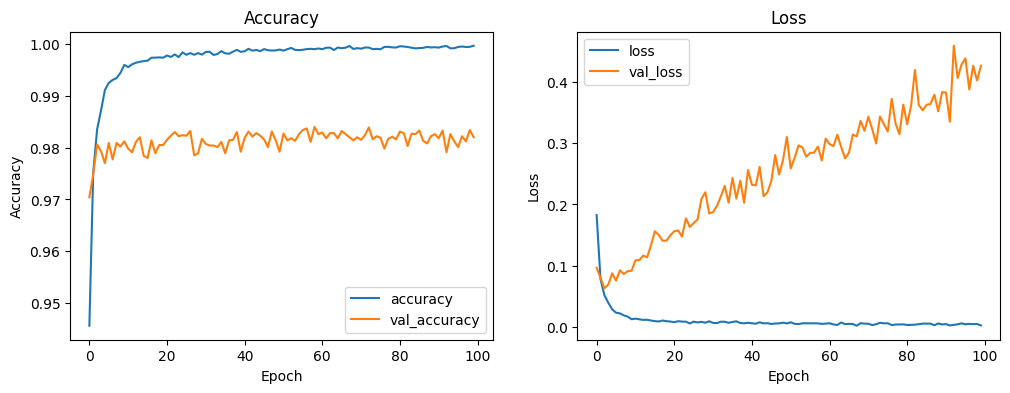

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=100, batch_size=16, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")
# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

b 32

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9039 - loss: 0.3266 - val_accuracy: 0.9680 - val_loss: 0.0993
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9748 - loss: 0.0858 - val_accuracy: 0.9724 - val_loss: 0.0866
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9841 - loss: 0.0495 - val_accuracy: 0.9798 - val_loss: 0.0648
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9886 - loss: 0.0348 - val_accuracy: 0.9777 - val_loss: 0.0750
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9922 - loss: 0.0250 - val_accuracy: 0.9792 - val_loss: 0.0691
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9945 - loss: 0.0178 - val_accuracy: 0.9792 - val_loss: 0.0735
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9955 - loss: 0.0148 - val_accuracy: 0.9822 - val_loss: 0.0669
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9957 -

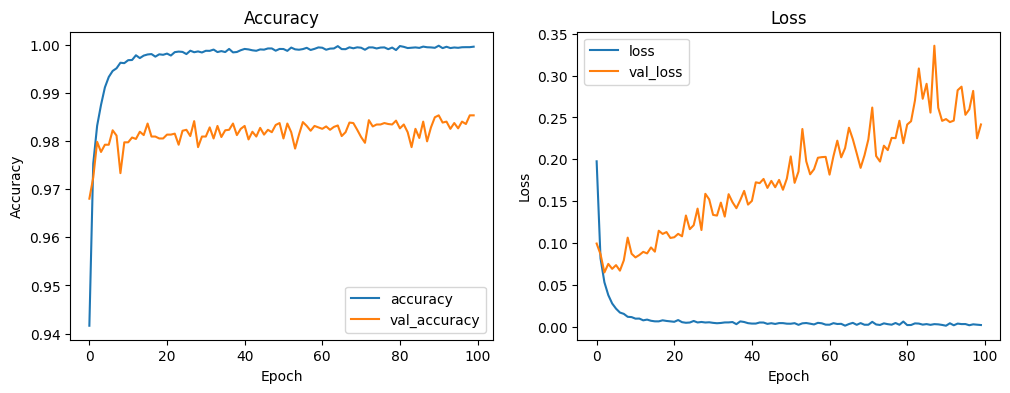

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=100, batch_size=32, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")
# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

b 64

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8868 - loss: 0.3844 - val_accuracy: 0.9653 - val_loss: 0.1214
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9712 - loss: 0.0988 - val_accuracy: 0.9753 - val_loss: 0.0810
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9826 - loss: 0.0564 - val_accuracy: 0.9770 - val_loss: 0.0742
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9879 - loss: 0.0386 - val_accuracy: 0.9809 - val_loss: 0.0611
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9915 - loss: 0.0276 - val_accuracy: 0.9799 - val_loss: 0.0695
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9931 - loss: 0.0222 - val_accuracy: 0.9787 - val_loss: 0.0730
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9957 - loss: 0.0150 - val_accuracy: 0.9796 - val_loss: 0.0692
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9961 - loss: 0.0134 - val_ac

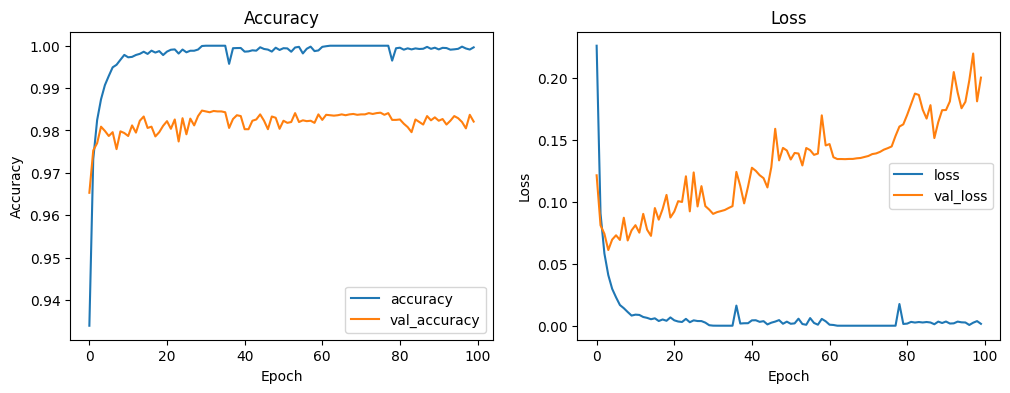

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=100, batch_size=64, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")
# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

###以下為跑128區塊###

###epoch 15###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8694 - loss: 0.4652 - val_accuracy: 0.9577 - val_loss: 0.1425
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9664 - loss: 0.1141 - val_accuracy: 0.9723 - val_loss: 0.0939
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9785 - loss: 0.0744 - val_accuracy: 0.9758 - val_loss: 0.0824
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9865 - loss: 0.0508 - val_accuracy: 0.9758 - val_loss: 0.0819
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9889 - loss: 0.0380 - val_accuracy: 0.9802 - val_loss: 0.0620
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9932 - loss: 0.0253 - val_accuracy: 0.9807 - val_loss: 0.0620
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9950 - loss: 0.0200 - val_accuracy: 0.9809 - val_loss: 0.0645
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9970 - loss: 0.0140 - val_accuracy

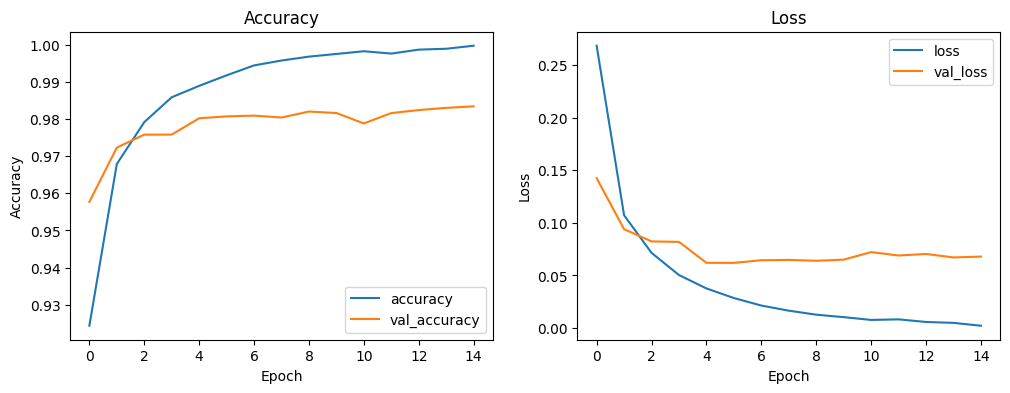

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=15, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")
# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

###epoch 25###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8652 - loss: 0.4727 - val_accuracy: 0.9602 - val_loss: 0.1341
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9668 - loss: 0.1134 - val_accuracy: 0.9713 - val_loss: 0.0924
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9795 - loss: 0.0705 - val_accuracy: 0.9790 - val_loss: 0.0730
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9864 - loss: 0.0475 - val_accuracy: 0.9783 - val_loss: 0.0727
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9892 - loss: 0.0385 - val_accuracy: 0.9795 - val_loss: 0.0631
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9931 - loss: 0.0260 - val_accuracy: 0.9797 - val_loss: 0.0662
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9943 - loss: 0.0204 - val_accuracy: 0.9821 - val_loss: 0.0615
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9964 - loss: 0.0153 - val_accuracy:

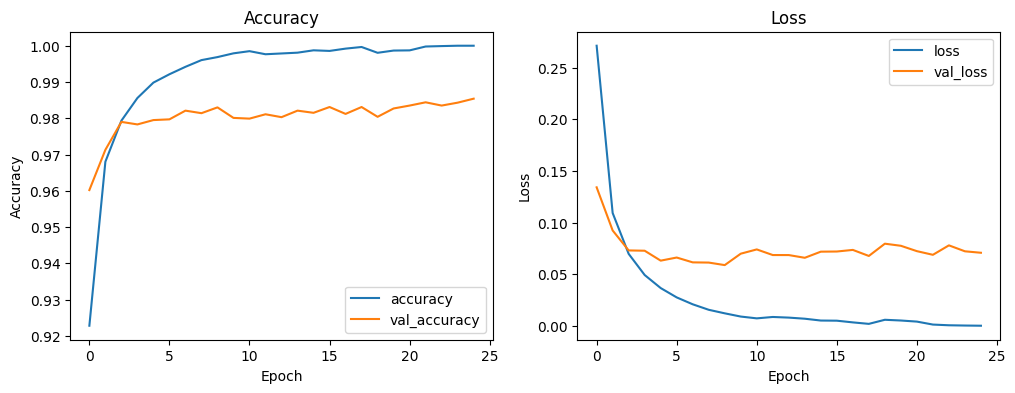

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")
# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

###epoch 50###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8720 - loss: 0.4627 - val_accuracy: 0.9594 - val_loss: 0.1393
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9683 - loss: 0.1138 - val_accuracy: 0.9709 - val_loss: 0.0927
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9778 - loss: 0.0729 - val_accuracy: 0.9764 - val_loss: 0.0775
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9850 - loss: 0.0517 - val_accuracy: 0.9775 - val_loss: 0.0697
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9895 - loss: 0.0369 - val_accuracy: 0.9803 - val_loss: 0.0618
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9936 - loss: 0.0258 - val_accuracy: 0.9806 - val_loss: 0.0631
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9953 - loss: 0.0182 - val_accuracy: 0.9808 - val_loss: 0.0616
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9957 - loss: 0.0166 - val_accura

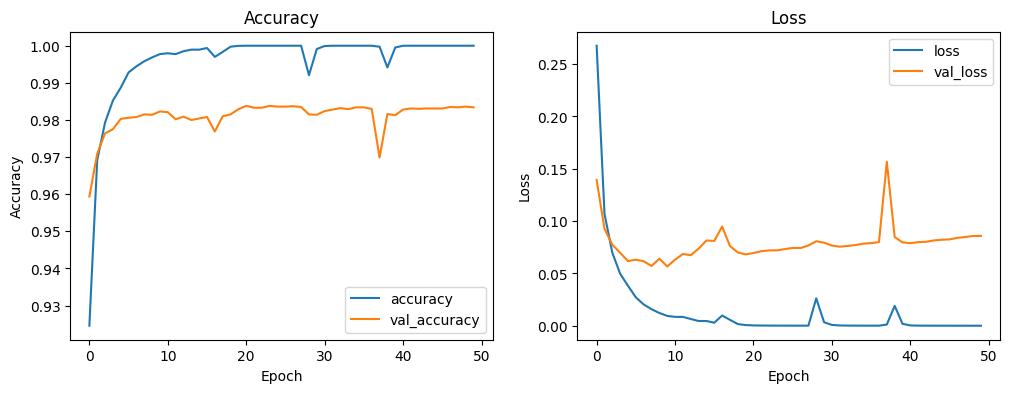

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=50, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")
# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

###epoch 100###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8733 - loss: 0.4575 - val_accuracy: 0.9618 - val_loss: 0.1336
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9663 - loss: 0.1157 - val_accuracy: 0.9709 - val_loss: 0.0949
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9802 - loss: 0.0710 - val_accuracy: 0.9755 - val_loss: 0.0792
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9864 - loss: 0.0495 - val_accuracy: 0.9784 - val_loss: 0.0709
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9898 - loss: 0.0354 - val_accuracy: 0.9793 - val_loss: 0.0666
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9926 - loss: 0.0268 - val_accuracy: 0.9800 - val_loss: 0.0635
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9954 - loss: 0.0184 - val_accuracy: 0.9810 - val_loss: 0.0603
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9964 - loss: 0.0151 - val

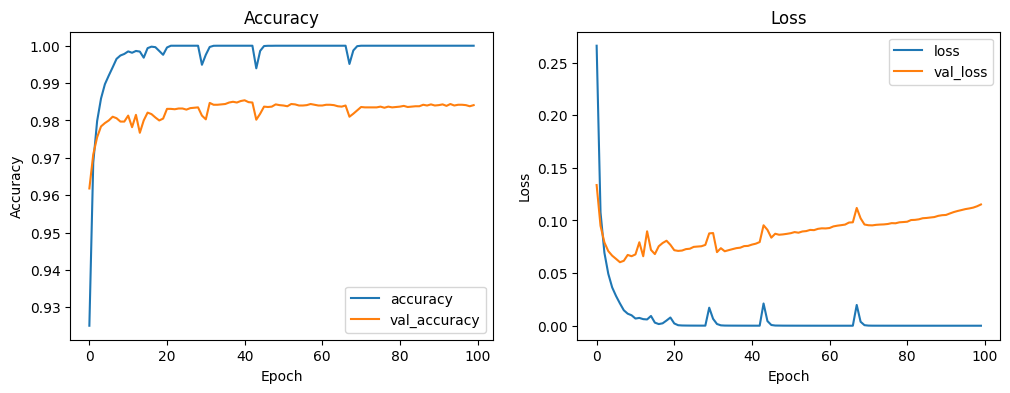

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=100, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")
# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()